### EVODEX Evaluation Demonstration

This notebook demonstrates the use of the EVODEX evaluation package, a tool designed for evaluating the mechanistic plausibility of proposed enzymatic reactions. The package facilitates the assessment of reaction operators by determining if they match known mechanistic patterns stored in the EVODEX dataset.

The EVODEX evaluation package offers two primary functions:

1. `assign_evodex_F`: This function calculates the formula difference for a given reaction and assigns an EVODEX-F ID if it exists. This ID indicates a known formula change pattern but does not confirm the specific mechanism.

2. `match_operator`: This function performs a more detailed analysis by projecting the reaction operator (SMIRKS) on the substrate and comparing the produced product with the expected product. It evaluates the operator against EVODEX-E, -C, or -N datasets to find a matching mechanism. This function is more computationally expensive but provides additional precision.

Both functions employ lazy loading and subsequent caching of EVODEX data to optimize performance. The computational cost involves indexing the EVODEX data efficiently, which happens once and is then saved as JSON files. The match_operator function incurs additional cost due to the need to project and match products for a shortlist of operators.

## Installation and Imports

In [ ]:
# Installation of the EVODEX library and import of evaluation methods
!pip install evodex

# Additional imports used in this notebook
import pandas as pd
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw

from evodex.evaluation import assign_evodex_F, match_operators


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.4/29.4 MB 13.7 MB/s eta 0:00:00



A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found


A module that was compiled using NumPy 1.x cannot be run in
NumPy 2.0.2 as it may crash. To support both 1.x and 2.x
versions of NumPy, modules must be compiled with NumPy 2.0.
Some module may need to rebuild instead e.g. with 'pybind11>=2.12'.

If you are a user of the module, the easiest solution will be to
downgrade to 'numpy<2' or try to upgrade the affected module.
We expect that some modules will need time to support NumPy 2.

Traceback (most recent call last):  File "<frozen runpy>", line 198, in _run_module_as_main
  File "<frozen runpy>", line 88, in _run_code
  File "/usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py", line 37, in <module>
    ColabKernelApp.launch_instance()
  File "/usr/local/lib/python3.11/dist-packages/traitlets/config/application.py", line 992, in launch_instance
    app.start()
  File "/usr/local/lib/python3.11/dist-packages/ipykernel/kernelapp.py", line 712, in start
    self.io_loop.start()
  File "/usr/local/lib/python3.11/dist-package

AttributeError: _ARRAY_API not found

## Define Substrates and Products for Evaluation

In [ ]:
# Define substrates
substrates = [
    "CCCO",  # Propanol
    "C([C@@H](C(=O)O)N)O"  # Serine
]

# Define products
products = [
    "CCC=O",  # Propanal
    "C([C@@H](C(=O)O)N)=O",  # Oxidized Serine
    "CCCOC",  # Methylation
    "CC(Br)CO"  # Unreachable product
]

# Combine substrates and products into test reactions
test_reactions = []
for substrate in substrates:
    for product in products:
        test_reactions.append(f"{substrate}>>{product}")

# Display test reactions
test_reactions


['CCCO>>CCC=O',
 'CCCO>>C([C@@H](C(=O)O)N)=O',
 'CCCO>>CCCOC',
 'CCCO>>CC(Br)CO',
 'C([C@@H](C(=O)O)N)O>>CCC=O',
 'C([C@@H](C(=O)O)N)O>>C([C@@H](C(=O)O)N)=O',
 'C([C@@H](C(=O)O)N)O>>CCCOC',
 'C([C@@H](C(=O)O)N)O>>CC(Br)CO']

## Evaluate Reactions Using assign_evodex_F

In [ ]:
# Evaluate each reaction using assign_evodex_F
assign_results = {}
for reaction in test_reactions:
    f_id = assign_evodex_F(reaction)
    assign_results[reaction] = f_id

# Display the results
assign_results


{'CCCO>>CCC=O': ['EVODEX.1-F4'],
 'CCCO>>C([C@@H](C(=O)O)N)=O': None,
 'CCCO>>CCCOC': ['EVODEX.1-F94'],
 'CCCO>>CC(Br)CO': None,
 'C([C@@H](C(=O)O)N)O>>CCC=O': None,
 'C([C@@H](C(=O)O)N)O>>C([C@@H](C(=O)O)N)=O': ['EVODEX.1-F4'],
 'C([C@@H](C(=O)O)N)O>>CCCOC': None,
 'C([C@@H](C(=O)O)N)O>>CC(Br)CO': None}

## Evaluate Reactions Using match_operator

In [ ]:
# Evaluate each reaction using match_operator
match_results = {}
for reaction in test_reactions:
    matched_operators = match_operators(reaction, 'E')
    match_results[reaction] = matched_operators

# Display the results
match_results


{'CCCO>>CCC=O': ['EVODEX.1-E40'],
 'CCCO>>C([C@@H](C(=O)O)N)=O': [],
 'CCCO>>CCCOC': ['EVODEX.1-E480'],
 'CCCO>>CC(Br)CO': [],
 'C([C@@H](C(=O)O)N)O>>CCC=O': [],
 'C([C@@H](C(=O)O)N)O>>C([C@@H](C(=O)O)N)=O': ['EVODEX.1-E40'],
 'C([C@@H](C(=O)O)N)O>>CCCOC': [],
 'C([C@@H](C(=O)O)N)O>>CC(Br)CO': []}

## Summary of Results

In [ ]:
# Combine and display results from both functions
summary = []
for reaction in test_reactions:
    summary.append({
        'Reaction': reaction,
        'EVODEX-F': assign_results.get(reaction),
        'Matched Operators': match_results.get(reaction)
    })

# Convert summary to a DataFrame for better display
df_summary = pd.DataFrame(summary)
df_summary


,Reaction,EVODEX-F,Matched Operators
0,CCCO>>CCC=O,[EVODEX.1-F4],[EVODEX.1-E40]
1,CCCO>>C([C@@H](C(=O)O)N)=O,None,[]
2,CCCO>>CCCOC,[EVODEX.1-F94],[EVODEX.1-E480]
3,CCCO>>CC(Br)CO,None,[]
4,C([C@@H](C(=O)O)N)O>>CCC=O,None,[]
5,C([C@@H](C(=O)O)N)O>>C([C@@H](C(=O)O)N)=O,[EVODEX.1-F4],[EVODEX.1-E40]
6,C([C@@H](C(=O)O)N)O>>CCCOC,None,[]
7,C([C@@H](C(=O)O)N)O>>CC(Br)CO,None,[]


## Visualize the Molecules

Good Reactions:


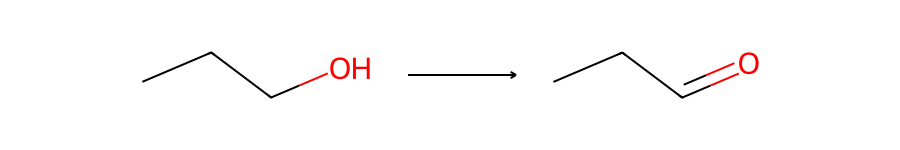

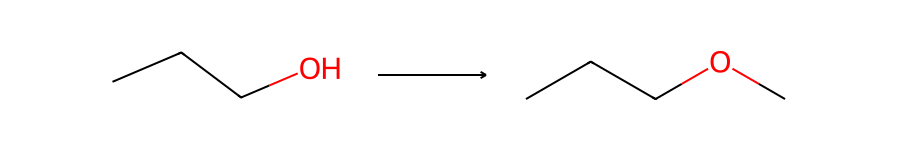

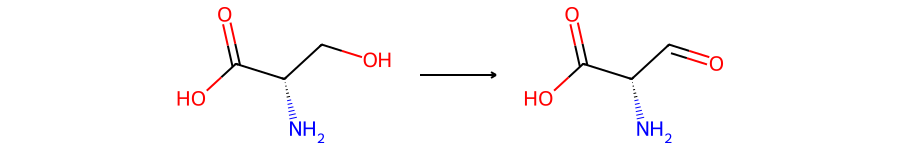

Bad Reactions:


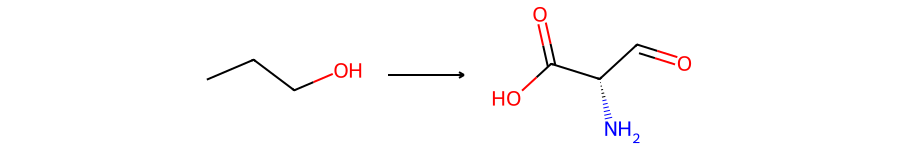

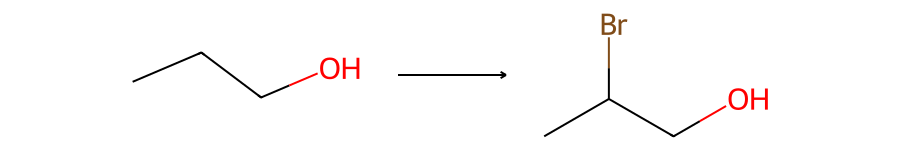

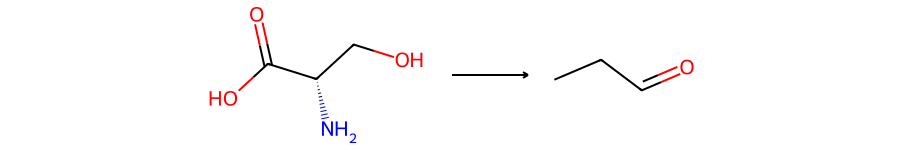

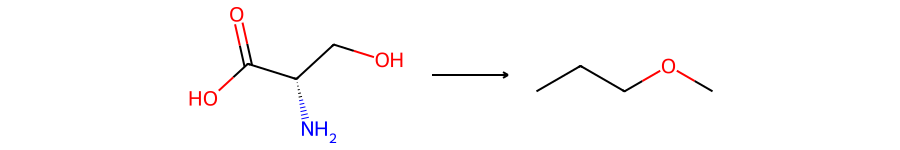

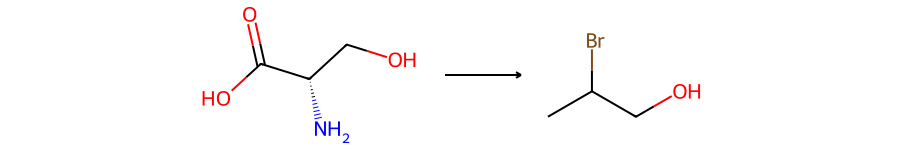

In [ ]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import ReactionToImage

# Function to draw reactions with arrows
def draw_reactions_with_arrows(reactions):
    rxn_images = []
    for reaction in reactions:
        rxn = AllChem.ReactionFromSmarts(reaction, useSmiles=True)
        img = ReactionToImage(rxn, subImgSize=(300, 150))
        rxn_images.append(img)
    return rxn_images

# Prepare reactions based on analysis results in df_summary
good_reactions = df_summary[df_summary['Matched Operators'].apply(lambda x: len(x) > 0)]['Reaction'].tolist()
bad_reactions = df_summary[df_summary['Matched Operators'].apply(lambda x: len(x) == 0)]['Reaction'].tolist()

# Draw the good reactions
print("Good Reactions:")
good_reaction_images = draw_reactions_with_arrows(good_reactions)
for img in good_reaction_images:
    display(img)

# Draw the bad reactions
print("Bad Reactions:")
bad_reaction_images = draw_reactions_with_arrows(bad_reactions)
for img in bad_reaction_images:
    display(img)


## Explanation and Final Thoughts

The first three reactions are matched to EVODEX-E reactions that apply to primary alcohols, specifically identifying oxidation and methylation processes. The five 'bad' reactions either change the carbon chain or rearrange the atoms in a manner that no enzyme would catalyze.

There is a third way to do validation with EVODEX operators Cm, Em, and Nm. This method involves atom-to-atom mapping of the reaction, calculating its EVODEX-Em or the others, and then checking if it matches any of the previously mined operators. This would enable a less biased method of validation--the 'complete' operators C, N, and E include unmapped atoms and thus contain portions of molecules not relevant to the enzyme mechanism.  The 'matched' operators Cm, Nm, and Em only contain atoms around the reaction centers and thus more narrowly capture the idea of mechanistic sufficiency. However, this approach requires the use of atom-to-atom mapping algorithms and data sanitization, which are currently imperfect and outside the scope of EVODEX algorithms. As a result, we have not demonstrated this approach here.